In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Programming\ML_DATA\\weight-height.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.isnull().sum() 

Gender    0
Height    0
Weight    0
dtype: int64

# convert categorical data to numeric data

In [6]:
# label encoding
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
df.Gender = le.fit_transform(df['Gender'])

In [9]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [10]:
df.Gender.unique() # Male = 1 , Female = 0

array([1, 0])

In [11]:
x = df.drop('Weight',axis=1)
y = df.Weight

In [12]:
x.shape

(8555, 2)

In [13]:
y.shape

(8555,)

# Train test Split for this data 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=51)

# Model fitting with LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
pred = lr.predict(x_test)

In [20]:
# Evaluate Model (Accuracy, MSE, MAE)
from sklearn.metrics import mean_absolute_error,mean_squared_error
accuracy = lr.score(x_test,y_test) # Accuracy
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)

In [21]:
print("Accuracy Value is : ", accuracy)
print("Mean Absolute Error is : ", mae)
print("Mean Squared Error is : ", mse)

Accuracy Value is :  0.8944599600824594
Mean Absolute Error is :  8.119090042562583
Mean Squared Error is :  106.4179733000685


# KNN Regressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
reg = KNeighborsRegressor()

In [24]:
reg.fit(x_train,y_train)

KNeighborsRegressor()

In [25]:
# Evaluate Model (Accuracy, MSE, Prediction)
Accuracy = reg.score(x_test,y_test) # Before Turning Accuracy is 0.8733063390964783
mse = mean_squared_error(y_test,reg.predict(x_test)) # mean squared error 127.74756039369427
Prediction = reg.predict(x_test) # Prediction 

In [26]:
reg.score(x_test,y_test)

0.8733063390964783

# Hyperparameter Optimization for K value using RandomizedSearchCV

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
k = np.random.randint(1,50,60)

# Define a list of parameters for the models
params = {
    'n_neighbors' : k
}

# we can build Grid Scearch CV using the above parameters.
# cv = 5 means cross validation with 5 filds
random_search = RandomizedSearchCV(reg,params,n_iter=5,cv=5,n_jobs=-1,verbose=0)

In [29]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': array([31,  5,  3, 25, 13, 18,  7, 26, 45, 10, 34, 26, 20, 14,  4, 27, 36,
       48, 17,  6, 13,  6,  2, 29, 45, 49, 46,  1, 22, 15,  2,  4, 24, 18,
        9, 49,  3,  3, 34, 45,  3, 11, 19, 27, 44, 14, 40, 29, 42, 34, 31,
       39, 39, 12, 34, 30, 34, 47, 49, 43])})

In [30]:
random_search.best_score_ 

0.8983964336426652

In [31]:
random_search.best_params_ # Best K Values is : 43

{'n_neighbors': 39}

In [32]:
random_search.score(x_test,y_test)

0.891354976891699

In [33]:
pred = random_search.predict(x_test)
pred

array([157.69496634, 148.47799041, 195.78122823, ..., 163.20054852,
       191.46093675, 152.27054418])

In [34]:
# Before Turning Accuracy is : ( 0.8733063390964783 )
# After Turning Accuracy is : ( 0.8916018810811057 ) 
# After Turning Best K Values is : 43 

In [35]:
# Evaluate Model (Accuracy, MSE, Prediction)
Accuracy = random_search.score(x_test,y_test)
Prediction = random_search.predict(x_test)
mse = mean_squared_error(y_test,Prediction)

print("Accuracy : ", Accuracy)
print("Mean Squared Error : ", mse)

Accuracy :  0.891354976891699
Mean Squared Error :  109.54878525115055


In [36]:
# Accuracy :  0.8916018810811057
# Mean Squared Error :  109.29982719261194

# Step 2 

In [37]:
df2 = pd.read_csv(r"D:\Programming\ML_DATA\\weight-height.csv")

In [38]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [39]:
x = df.drop('Gender',axis=1)
y = df.Gender

# Train test Split

In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.70,random_state=42)

In [41]:
xtrain

,Height,Weight
553,67.594031,186.751417
1397,71.601697,211.031652
7934,62.625985,143.768451
8367,66.136131,151.814648
3320,71.843308,196.505814
...,...,...
5734,63.349988,139.223151
5191,58.861625,90.728561
5390,64.325406,156.800504
860,69.074492,179.386817


# KNN Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
clf = KNeighborsClassifier(n_neighbors=43)

In [46]:
clf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=43)

In [47]:
clf.score(xtest,ytest)

0.9197506817296455

# Evaluate Model

In [49]:
# Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, plot_roc_curve , accuracy_score

In [51]:
accuracy = accuracy_score(ytest,clf.predict(xtest)) #
clf_report = classification_report(ytest,clf.predict(xtest))
con_mat = confusion_matrix(ytest,clf.predict(xtest))

In [53]:
# Classification Report 
print(clf_report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1066
           1       0.93      0.94      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



In [54]:
# accuracy 
print("Accuracy is : ", accuracy)

Accuracy is :  0.9197506817296455


In [55]:
# confusion_matrix
print(con_mat)

[[ 953  113]
 [  93 1408]]


Text(51.0, 0.5, 'Actual Values')

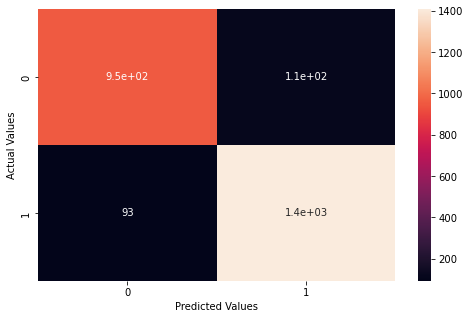

In [56]:
plt.figure(figsize=(8,5))
sns.heatmap(con_mat, annot=True)
plt.xlabel('Predicted Values',)
plt.ylabel('Actual Values')

# roc_curve

<Figure size 864x576 with 0 Axes>

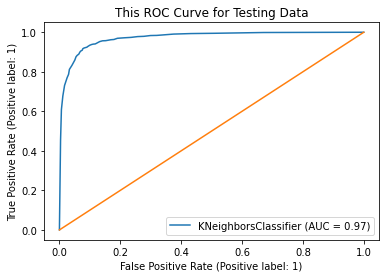

In [58]:
plt.figure(figsize=(12,8))
plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])
plt.title("This ROC Curve for Testing Data")
plt.show()

# 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.1 is consideredoutstanding

In [60]:
# Classification Report 
print(clf_report)
# accuracy 
print("Accuracy is : ", accuracy)
# confusion_matrix
print("Confusion Matrix ",con_mat)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1066
           1       0.93      0.94      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567

Accuracy is :  0.9197506817296455
Confusion Matrix  [[ 953  113]
 [  93 1408]]
